# Taller Final: Análisis Exploratorio de Datos
# Propensión de Mora

## Presentado por: Raul Echeverry Lopez y Esteban Ordoñez Erazo
---
## Tabla de Contenido:
### 1. Pregunta Smart
### 2. Obtención de Datos
### 3. Análisis Estructural
### 4. Análisis univariado y normalización
####    4.1. Análisis univariado categórico
####   4.2. Análisis univariado númerico
####    4.3. Conclusiones y recomendaciones
### 5. Análisis multivariado y normalización
####    5.1. Conclusiones y recomendaciones
### 6. Modelo Predictivo de Mora
---
---

## 1. Pregunta Smart  (Luis Ordoñez / Raul Echeverry)
### ¿Qué características tiene los clientes que caen en mora?

## 2. Obtener los datos

### Obtenemos datos a partir archivo provisiones de la entidad

In [1]:
#Cargamos librerias


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
# Cargamos el dataset

df=pd.read_csv("0_mora_v3.csv",  encoding="latin-1", sep=';',decimal=",")

In [3]:
#observamos los 10 primeros registros del dataset
df.head(10)

,ID,Sector_Actividad,Tasa,Monto,Plazo_Meses,Antiguedad,Sexo,Tipo_Vivienda,Tipo_cliente,Edad,Personas_a_Cargo,Estado_Civil,Mora
0,1,COMERCIO,52.89,2400000,12,2,1.0,Arrendada,Nuevo,24,0,Unión Libre,No
1,2,AGRICULTURA,55.00,5582000,23,2,1.0,Arrendada,Nuevo,34,1,Casado/a,Si
2,3,COMERCIO,52.39,2300000,20,2,1.0,Arrendada,Nuevo,23,0,Soltero/a,No
3,4,ARTESANÍAS,55.20,1774000,16,2,2.0,Familiar,Nuevo,22,0,Soltero/a,No
4,5,SERVICIOS,63.00,2000000,14,2,1.0,Familiar,Nuevo,21,0,Soltero/a,No
5,6,SERVICIOS,52.89,4100000,18,2,1.0,Familiar,Nuevo,23,1,Unión Libre,No
6,7,SERVICIOS,52.39,1300000,12,2,2.0,Familiar,Nuevo,21,0,Soltero/a,Si
7,8,COMERCIO,52.89,3500000,12,2,2.0,Familiar,Nuevo,20,0,Soltero/a,No
8,9,COMERCIO,51.50,6581000,19,2,1.0,Arrendada,Nuevo,24,0,Soltero/a,Si
9,10,COMERCIO,52.39,2440000,18,2,1.0,Familiar,Nuevo,23,0,Soltero/a,No


In [4]:
#observamos los 10 ultimos registros del dataset
df.tail(10)

,ID,Sector_Actividad,Tasa,Monto,Plazo_Meses,Antiguedad,Sexo,Tipo_Vivienda,Tipo_cliente,Edad,Personas_a_Cargo,Estado_Civil,Mora
143029,143030,ACTIVIDADES DEPENDIENTES,34.98,3000000,11,2,2.0,Arrendada,Nuevo,28,1,Soltero/a,No
143030,143031,COMERCIO,52.89,3500000,12,2,1.0,Arrendada,Nuevo,44,2,Unión Libre,No
143031,143032,COMERCIO,40.00,25770960,30,2,1.0,Familiar,Nuevo,31,0,Soltero/a,No
143032,143033,ACTIVIDADES DEPENDIENTES,39.80,3273600,16,2,2.0,Arrendada,Nuevo,33,1,Separado/a,No
143033,143034,SERVICIOS,54.00,6469000,27,2,2.0,Propia con Deuda,Nuevo,32,0,Soltero/a,No
143034,143035,COMERCIO,52.89,4350000,18,2,1.0,NaN,Nuevo,35,3,Soltero/a,No
143035,143036,COMERCIO,46.00,15300000,12,2,1.0,NaN,Nuevo,32,1,Casado/a,No
143036,143037,COMERCIO,52.39,4500000,12,2,1.0,NaN,Nuevo,42,2,Unión Libre,No
143037,143038,COMERCIO,43.14,8200000,24,2,2.0,Arrendada,Nuevo,67,0,NaN,No
143038,143039,COMERCIO,52.39,6000000,24,2,2.0,Propia con Deuda,Nuevo,55,0,Casado/a,No


## 3. Analisis Estructural

In [5]:
#conocemos la cantidad de filas y columnas del dataset
df.shape

(143039, 13)

In [6]:
#conocemos si existen campos nulos y el tipo de variable de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143039 entries, 0 to 143038
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                143039 non-null  int64  
 1   Sector_Actividad  143037 non-null  object 
 2   Tasa              143002 non-null  float64
 3   Monto             143039 non-null  int64  
 4   Plazo_Meses       143039 non-null  int64  
 5   Antiguedad        143039 non-null  int64  
 6   Sexo              142795 non-null  float64
 7   Tipo_Vivienda     141545 non-null  object 
 8   Tipo_cliente      143039 non-null  object 
 9   Edad              143039 non-null  int64  
 10  Personas_a_Cargo  143039 non-null  int64  
 11  Estado_Civil      142724 non-null  object 
 12  Mora              143039 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 14.2+ MB


Existen 5 columnas con campos nulos: Sector_Actividad, Tasa, Sexo, Tipo_Vivienda y Estado_Civil.

#### Tipo de variables del dataset

| Columna | Descripción | Tipo |
|:--------:|:--------:|:--------:|
| ID | Identificador de cliente | Cuantitativa Discreta | 
| Sector_Actividad | Actividad del cliente | Cualitativa Nominal| 
| Tasa | Tasa de interés efectiva anual  | Cuantitativa Cotinua | 
| Monto | Monto solicitado por el cliente  | Cuantitativa Discreta| 
| Plazo_Meses | Plazo del crédito en número de meses | Cuantitativa Discreta| 
| Antiguedad | Años de antiguedad del cliente en la entidad | Cuantitativa Discreta| 
| Sexo | Genero del cliente | Cualitativa Nominal| 
| Tipo_Vivienda | Tipo de propiedad de vivienda del cliente | Cualitativa Nominal|
| Tipo_cliente | Categoria interna del cliente | Cualitativa Ordinal|
| Edad | Edad en años del cliente | Cuantitativa Discreta|
| Personas_a_Cargo | Personas a cargo económicamente del cliente | Cuantitativa Discreta|
| Estado_Civil | Estado civíl del cliente | Cualitativa Ordinal |
| Mora | Identificador de Mora del cliente - Variable objetivo, 1:si y 2:no | Cuantitativa Discreta|

#### Detección de cantidad de valores nulos por columna

In [7]:
df.isna().sum()

ID                     0
Sector_Actividad       2
Tasa                  37
Monto                  0
Plazo_Meses            0
Antiguedad             0
Sexo                 244
Tipo_Vivienda       1494
Tipo_cliente           0
Edad                   0
Personas_a_Cargo       0
Estado_Civil         315
Mora                   0
dtype: int64

## 4. Análisis y noemalizacion de Variables

## 4.1. Análisis univariado categórico

In [8]:
# Definimos una función para el manejo de tablas de frecuencia
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

### Sector de actividad del cliente:

In [9]:
df['Sector_Actividad'].value_counts(dropna=False)

Sector_Actividad
AGRICULTURA                   40570
SERVICIOS                     31837
COMERCIO                      28004
PECUARIO                      20117
ACTIVIDADES DEPENDIENTES      10613
INDUSTRIA                      4209
AGROINDUSTRIA                  2662
CONFECCIONES                   2215
ARTESANÍAS                     1074
MADERA                          924
PESCA                           317
CUEROS                          305
ALFARERÍA                       108
METALMECÁNICA                    62
ACTIVIDADES INDEPENDIENTES       20
NaN                               2
Name: count, dtype: int64

In [10]:
# Reemplazamos los datos nulos por la actividad con mayor frecuencia, es decir, Agricultura

In [11]:
df['Sector_Actividad'].replace(np.nan, "AGRICULTURA", inplace=True)

In [12]:
tabla_actividad=tabla_freq(df['Sector_Actividad'])
tabla_actividad

col_0,Sector_Actividad,Frec. Abs.,Frec. Rel.
0,ACTIVIDADES DEPENDIENTES,10613,0.074197
1,ACTIVIDADES INDEPENDIENTES,20,0.000140
2,AGRICULTURA,40572,0.283643
3,AGROINDUSTRIA,2662,0.018610
4,ALFARERÍA,108,0.000755
5,ARTESANÍAS,1074,0.007508
6,COMERCIO,28004,0.195779
7,CONFECCIONES,2215,0.015485
8,CUEROS,305,0.002132
9,INDUSTRIA,4209,0.029426


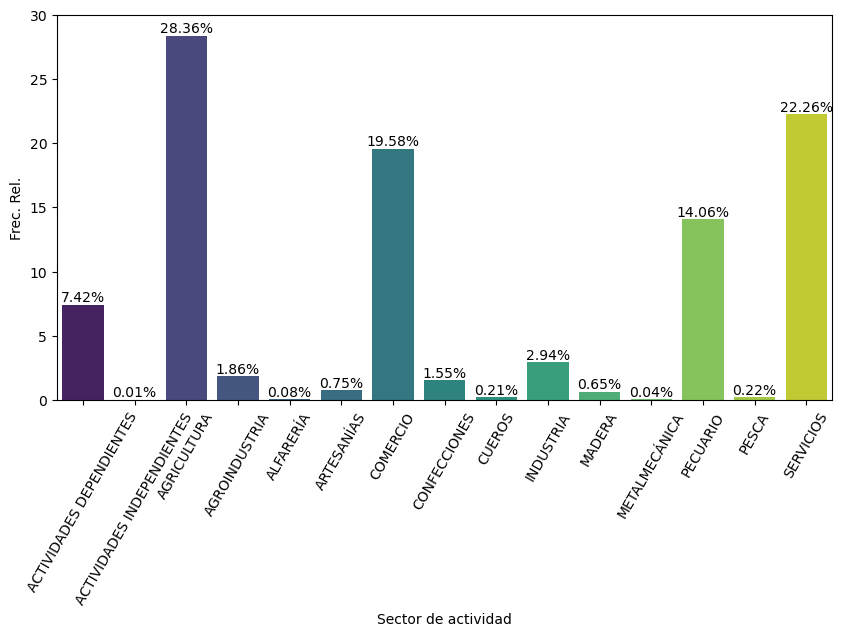

In [13]:
plt.figure(figsize=(10,5)) 
frec_actividad=sns.barplot(x=tabla_actividad['Sector_Actividad'],y=tabla_actividad["Frec. Rel."]*100, palette = "viridis")
frec_actividad.bar_label(frec_actividad.containers[0], label_type='edge',fmt='%.2f%%') 
frec_actividad.set_xticklabels(frec_actividad.get_xticklabels(),rotation=60)
frec_actividad.set_xlabel('Sector de actividad')
frec_actividad.set(ylim=(0, 30))
plt.show()

Las tres principales actividades de los clientes son la agricultura, servicios y comercio, concentrando el 70% de los clientes.

### Género:

In [14]:
df['Sexo'].value_counts(dropna=False)

Sexo
2.0    71865
1.0    70909
NaN      244
3.0       12
4.0        9
Name: count, dtype: int64

De acuerdo con el diccionario de la empresa, en el sistema se registra al género femenino como 1 y masculino como 2. Como se puede observar, existen valores nulos y clasificaciones atípicas 3 y 4, por tanto, para el tratamiento de estos valores se decide reemplazar por el valor de mayor frecuencia, en este caso 2, es decir, género masculino.

In [15]:
# Reemplazar las categorías atípicas 3 y 4
df["Sexo"]=df["Sexo"].replace({1:"Mujer",2:"Hombre",3:"Hombre",4:"Hombre","nan":"Hombre"})
df["Sexo"].replace(np.nan, "Hombre", inplace=True)
tabla_genero=tabla_freq(df['Sexo'])
tabla_genero

col_0,Sexo,Frec. Abs.,Frec. Rel.
0,Hombre,72130,0.504268
1,Mujer,70909,0.495732


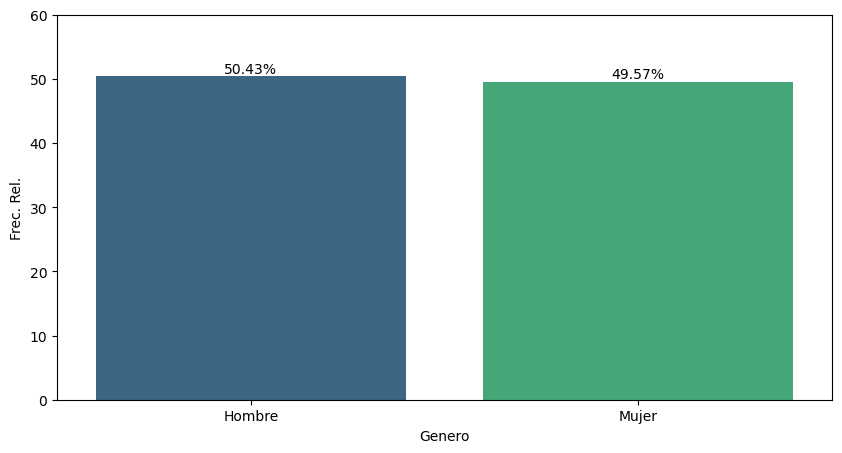

In [16]:
plt.figure(figsize=(10,5)) 
frec_genero=sns.barplot(x=tabla_genero['Sexo'],y=tabla_genero["Frec. Rel."]*100, palette = "viridis")
frec_genero.bar_label(frec_genero.containers[0], label_type='edge',fmt='%.2f%%') 
frec_genero.set(ylim=(0, 60))
frec_genero.set_xlabel('Genero')
plt.show() 

De la población analizada, se puede observar que la proporción en género es muy similar, es decir, hay tanta cantidad de hombres como de mujeres. Como se evidencia de los registros el 50.43% son hombres y 49.57% mujeres.

### Tipo de Vivienda

In [17]:
df['Tipo_Vivienda'].value_counts(dropna=False)

Tipo_Vivienda
Propia sin Deuda    69242
Familiar            39868
Arrendada           26522
Propia con Deuda     5873
NaN                  1494
Anticresis             40
Name: count, dtype: int64

In [18]:
# Reemplazamos los datos nulos por la el tipo de vivienda con mayor frecuencia, es decir, Propia sin deuda

In [19]:
df['Tipo_Vivienda'].replace(np.nan, "Propia sin Deuda", inplace=True)

In [20]:
tabla_vivienda=tabla_freq(df['Tipo_Vivienda'])
tabla_vivienda

col_0,Tipo_Vivienda,Frec. Abs.,Frec. Rel.
0,Anticresis,40,0.000280
1,Arrendada,26522,0.185418
2,Familiar,39868,0.278721
3,Propia con Deuda,5873,0.041059
4,Propia sin Deuda,70736,0.494522


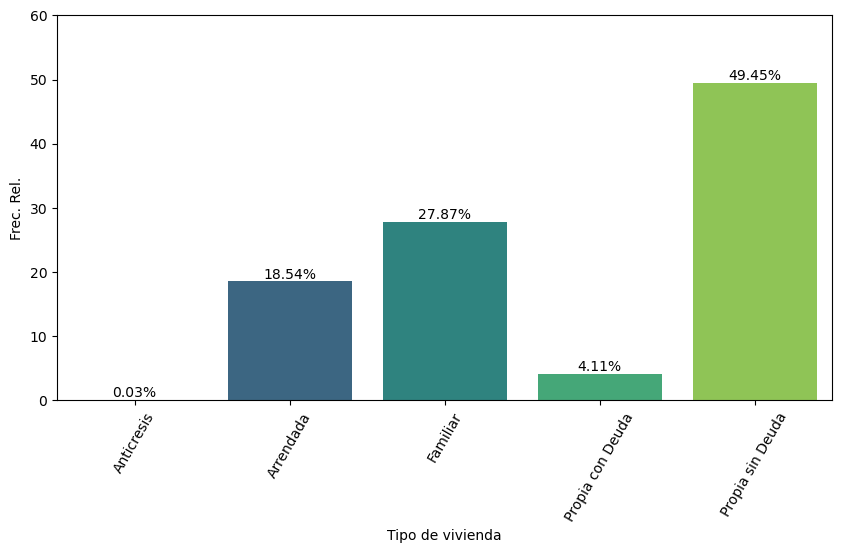

In [21]:
plt.figure(figsize=(10,5)) 
frec_vivienda=sns.barplot(x=tabla_vivienda['Tipo_Vivienda'],y=tabla_vivienda["Frec. Rel."]*100, palette = "viridis")
frec_vivienda.bar_label(frec_vivienda.containers[0], label_type='edge',fmt='%.2f%%') 
frec_vivienda.set_xticklabels(frec_vivienda.get_xticklabels(),rotation=60)
frec_vivienda.set_xlabel('Tipo de vivienda')
frec_vivienda.set(ylim=(0, 60))
plt.show()

De la población analizada se puede inferir que el 49.45% de lo clientes son dueños de su vivienda, la cual esta libre de deuda.

### Tipo de Cliente

In [22]:
df['Tipo_cliente'].value_counts(dropna=False)

Tipo_cliente
Nuevo           119547
Preferencial     23492
Name: count, dtype: int64

In [23]:
tabla_cliente=tabla_freq(df['Tipo_cliente'])
tabla_cliente

col_0,Tipo_cliente,Frec. Abs.,Frec. Rel.
0,Nuevo,119547,0.835765
1,Preferencial,23492,0.164235


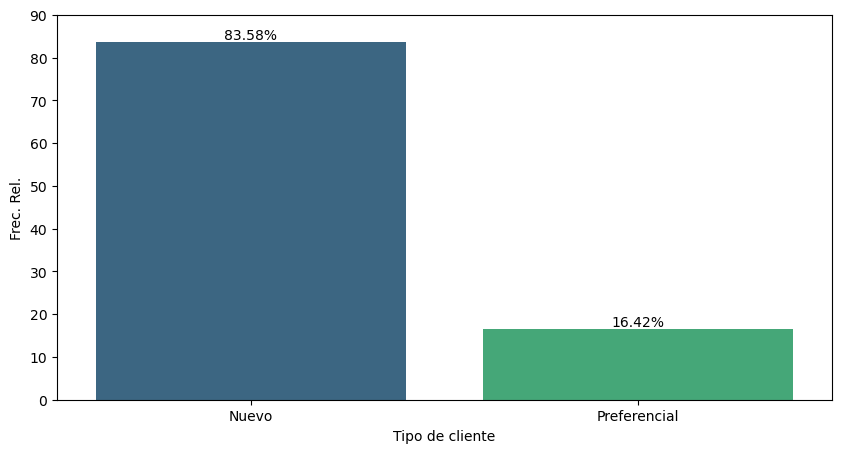

In [24]:
plt.figure(figsize=(10,5)) 
frec_cliente=sns.barplot(x=tabla_cliente['Tipo_cliente'],y=tabla_cliente["Frec. Rel."]*100, palette = "viridis")
frec_cliente.bar_label(frec_cliente.containers[0], label_type='edge',fmt='%.2f%%') 
frec_cliente.set_xticklabels(frec_cliente.get_xticklabels(),rotation=0)
frec_cliente.set_xlabel('Tipo de cliente')
frec_cliente.set(ylim=(0, 90))
plt.show()

Aproximadamente 8 de cada 10 clientes tiene categoría de nuevos, mientras que el 16,42% son preferenciales. Cabe recordar que esta categoría se otorga a los clientes que han tenido una trayectoria mayor a 36 meses y con un impecable comportamiento de pago.

### Estado civil del cliente

In [25]:
df['Estado_Civil'].value_counts(dropna=False)

Estado_Civil
Unión Libre     48014
Soltero/a       45436
Casado/a        34143
Separado/a      10821
Viudo/a          4254
NaN               315
Divorciado/a       56
Name: count, dtype: int64

In [26]:
# Reemplazamos los datos nulos por la el tipo estado civil con mayor frecuencia, es decir, Unión Libre
df['Estado_Civil'].replace(np.nan, "Unión Libre", inplace=True)

In [27]:
tabla_civil=tabla_freq(df['Estado_Civil'])
tabla_civil

col_0,Estado_Civil,Frec. Abs.,Frec. Rel.
0,Casado/a,34143,0.238697
1,Divorciado/a,56,0.000392
2,Separado/a,10821,0.075651
3,Soltero/a,45436,0.317648
4,Unión Libre,48329,0.337873
5,Viudo/a,4254,0.029740


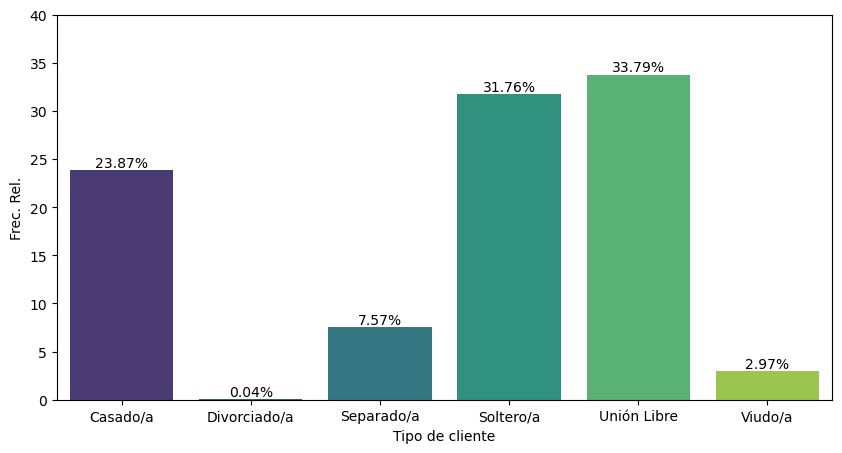

In [28]:
plt.figure(figsize=(10,5)) 
frec_civil=sns.barplot(x=tabla_civil['Estado_Civil'],y=tabla_civil["Frec. Rel."]*100, palette = "viridis")
frec_civil.bar_label(frec_civil.containers[0], label_type='edge',fmt='%.2f%%') 
frec_civil.set_xticklabels(frec_civil.get_xticklabels(),rotation=0)
frec_civil.set_xlabel('Tipo de cliente')
frec_civil.set(ylim=(0, 40))
plt.show()

Con base al gráfico anterior, se puede concluir que la mayor cantidad de clientes son personas en unión libre y solteras. En este segmento concentra alrededor del 65.55% de clientes totales de la entidad.

## 4.2. Análisis univariado númerico

In [29]:
# Definimos una función para el manejo de tablas descriptivas

def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    return tabla_descriptivas

### Tasa de interes Efectiva Anual:

In [30]:
# Contamos los datos nulos
df['Tasa'].isna().sum()

37

In [31]:
# Reemplazmos los valores nulos por el promedio de tasa
avg_tasa = df["Tasa"].astype("float").mean()
df["Tasa"].replace(np.nan, avg_tasa, inplace=True)

In [32]:
df['Tasa'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 143039 entries, 0 to 143038
Series name: Tasa
Non-Null Count   Dtype  
--------------   -----  
143039 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [33]:
# Describimos los datos
tabla_tasa=tabla_descriptivas(df['Tasa'])
tabla_tasa

,Tasa
count,143039.000000
mean,50.450773
std,6.712112
min,10.680000
25%,48.500000
50%,52.390000
75%,52.890000
max,70.000000
coef. variation,0.133043


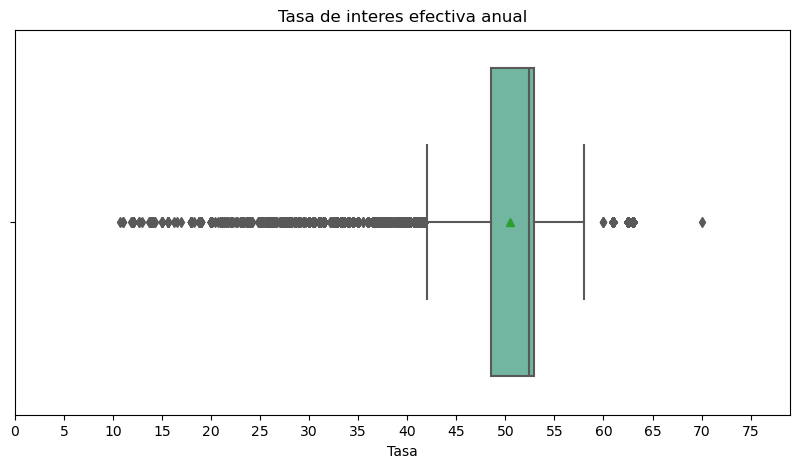

In [34]:
plt.figure(figsize=(10,5)) 
boxplot_tasa=sns.boxplot(x=df['Tasa'],palette = "Set2", showmeans=True) ## crea el boxplot
boxplot_tasa.set_xlabel('Tasa') ## cambia el título del eje x
boxplot_tasa.set_xlim(0, 79)                     ## cambia los límites del eje x
boxplot_tasa.set_xticks(range(0,80,5))               ## cambia los valores del eje x
boxplot_tasa.set_title('Tasa de interes efectiva anual')
plt.show() 

De acuerdo con el conocimiento del negocio, se puede evidenciar outliers, dado que las tasas no pueden ser inferiores a 33.30% y máximo 68.81%, esto dado unas políticas en tasa de usura de la Superintendencia Financiera de Colombia, por tanto, se llevan estos outliers al valor promedio de tasa.

In [35]:
#Reemplazamos 

In [36]:
df.loc[df['Tasa'] < 33.30, 'Tasa'] = avg_tasa
df.loc[df['Tasa'] > 68.81, 'Tasa'] = avg_tasa

In [37]:
# Volvemos a describir los datos
tabla_tasa2=tabla_descriptivas(df['Tasa'])
tabla_tasa2

,Tasa
count,143039.000000
mean,51.090954
std,5.496952
min,33.500000
25%,49.040000
50%,52.390000
75%,52.890000
max,63.000000
coef. variation,0.107591


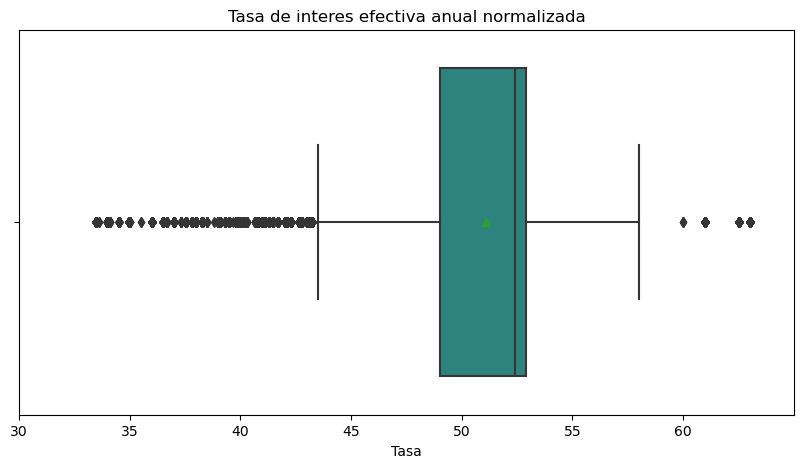

In [38]:
plt.figure(figsize=(10,5)) 
boxplot_tasa2=sns.boxplot(x=df['Tasa'],palette = "viridis", showmeans=True) ## crea el boxplot
boxplot_tasa2.set_xlabel('Tasa') ## cambia el título del eje x
boxplot_tasa2.set_xlim(30, 65)                     ## cambia los límites del eje x
boxplot_tasa2.set_xticks(range(30,65,5))               ## cambia los valores del eje x
boxplot_tasa2.set_title('Tasa de interes efectiva anual normalizada')
plt.show() 

Se puede asumir que las taas de los prestamos se encuentran por encimas del 48% y por debajo del 53%

In [39]:
df["Mora"].value_counts()

Mora
No    120343
Si     22696
Name: count, dtype: int64

### Monto solicitado por el cliente:

In [40]:
# Confirmamos que no existan valores nulos
df['Monto'].isna().sum()

0

In [41]:
df['Monto'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 143039 entries, 0 to 143038
Series name: Monto
Non-Null Count   Dtype
--------------   -----
143039 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [42]:
# Describimos los datos
tabla_monto=tabla_descriptivas(df['Monto'])
tabla_monto

,Monto
count,1.430390e+05
mean,5.342129e+06
std,8.440950e+06
min,0.000000e+00
25%,2.206000e+06
50%,3.500000e+06
75%,5.569500e+06
max,3.300000e+08
coef. variation,1.580072e+00


c:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


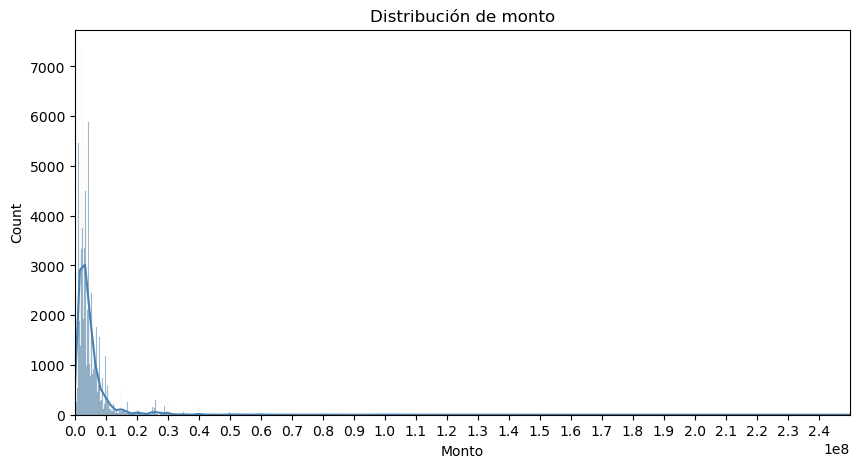

In [43]:
plt.figure(figsize=(10,5)) 
hist_Monto=sns.histplot(x=df["Monto"],kde=True,color="steelblue") ## crea el boxplot
hist_Monto.set_xlabel('Monto') ## cambia el título del eje x
hist_Monto.set_xlim(0, 250000001)                     ## cambia los límites del eje x
hist_Monto.set_xticks(range(0,250000000,10000000))             ## cambia los valores del eje x
hist_Monto.set_title('Distribución de monto')
plt.show()

De acuerdo con el conocimiento del negocio, se puede evidenciar outliers, dado que los montos no pueden ser inferiores a $800.000. El monto máximo está en $330.000.000.

In [44]:
#Reemplazamos los outliers por valores el promedio de monto
df.loc[df['Monto'] < 800000, 'Monto'] = df["Monto"].astype("int").mean()

C:\Users\Raul Echeverry\AppData\Local\Temp\ipykernel_2848\1296247200.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5342129.495249547' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Monto'] < 800000, 'Monto'] = df["Monto"].astype("int").mean()


In [45]:
# Describimos los datos
tabla_monto2=tabla_descriptivas(df['Monto'])
tabla_monto2

,Monto
count,1.430390e+05
mean,5.384516e+06
std,8.429072e+06
min,8.000000e+05
25%,2.270000e+06
50%,3.500000e+06
75%,5.569500e+06
max,3.300000e+08
coef. variation,1.565428e+00


c:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


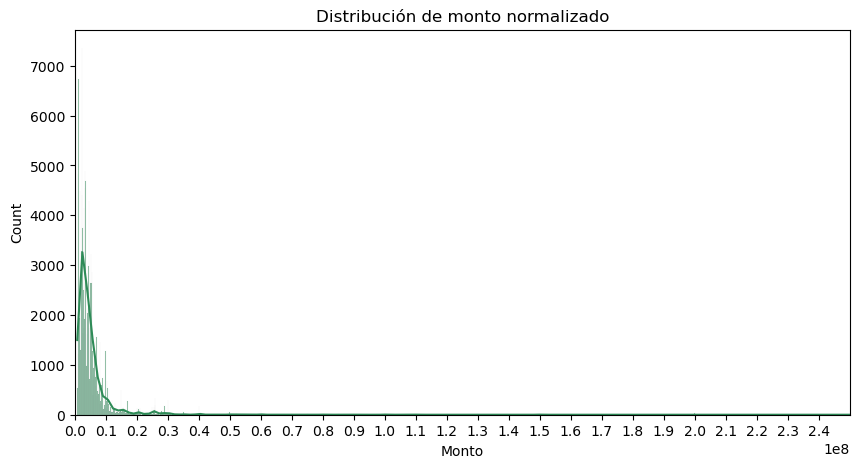

In [46]:
plt.figure(figsize=(10,5)) 
hist_Monto2=sns.histplot(x=df["Monto"],kde=True,color="seagreen") ## crea el boxplot
hist_Monto2.set_xlabel('Monto') ## cambia el título del eje x
hist_Monto2.set_xlim(0, 250000000)                     ## cambia los límites del eje x
hist_Monto2.set_xticks(range(0,250000000,10000000))             ## cambia los valores del eje x
hist_Monto2.set_title('Distribución de monto normalizado')
plt.show()

### Plazo del crédito en meses:

In [47]:
# Confirmamos que no existan valores nulos
df['Plazo_Meses'].isna().sum()

0

In [48]:
df['Plazo_Meses'].describe()

count    143039.000000
mean         18.877062
std           8.219228
min           0.000000
25%          12.000000
50%          18.000000
75%          24.000000
max         113.000000
Name: Plazo_Meses, dtype: float64

In [49]:
tabla_plazo=tabla_descriptivas(df['Plazo_Meses'])
tabla_plazo

,Plazo_Meses
count,143039.000000
mean,18.877062
std,8.219228
min,0.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,113.000000
coef. variation,0.435408


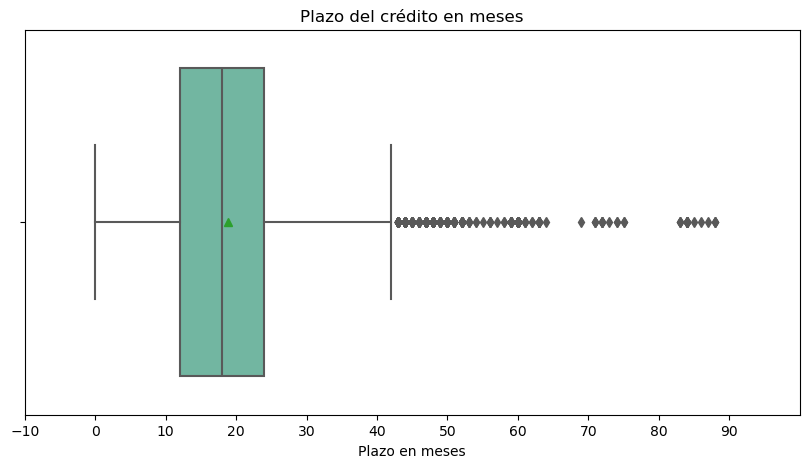

In [50]:
plt.figure(figsize=(10,5)) 
boxplot_plazo=sns.boxplot(x=df['Plazo_Meses'],palette = "Set2", showmeans=True) ## crea el boxplot
boxplot_plazo.set_xlabel('Plazo en meses') ## cambia el título del eje x
boxplot_plazo.set_xlim(-10, 100)                     ## cambia los límites del eje x
boxplot_plazo.set_xticks(range(-10,100,10))               ## cambia los valores del eje x
boxplot_plazo.set_title('Plazo del crédito en meses')
plt.show() 

De acuerdo con el conocimiento del negocio, se puede evidenciar outliers, dado que los plazos mínimo deben ser de 3 meses y máximo de 60 meses

In [51]:
#Reemplazamos los outliers por valores el promedio de plazo
df.loc[df['Plazo_Meses'] < 3,'Plazo_Meses'] = df["Plazo_Meses"].astype("float").mean()
df.loc[df['Plazo_Meses'] > 60,'Plazo_Meses'] = 60

C:\Users\Raul Echeverry\AppData\Local\Temp\ipykernel_2848\2825629625.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18.877061500709598' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Plazo_Meses'] < 3,'Plazo_Meses'] = df["Plazo_Meses"].astype("float").mean()


In [52]:
tabla_plazo2=tabla_descriptivas(df['Plazo_Meses'])
tabla_plazo2

,Plazo_Meses
count,143039.000000
mean,18.906406
std,8.143764
min,3.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,60.000000
coef. variation,0.430741


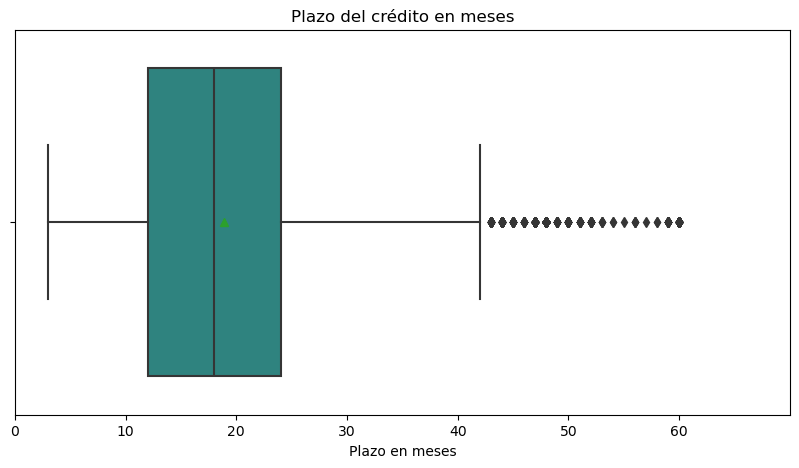

In [53]:
plt.figure(figsize=(10,5)) 
boxplot_plazo2=sns.boxplot(x=df['Plazo_Meses'],palette = "viridis", showmeans=True) ## crea el boxplot
boxplot_plazo2.set_xlabel('Plazo en meses') ## cambia el título del eje x
boxplot_plazo2.set_xlim(0, 70)                     ## cambia los límites del eje x
boxplot_plazo2.set_xticks(range(0,70,10))               ## cambia los valores del eje x
boxplot_plazo2.set_title('Plazo del crédito en meses')
plt.show() 

### Antiguedad

In [54]:
# Confirmamos que no existan valores nulos
df['Antiguedad'].isna().sum()

0

In [55]:
tabla_antiguedad=tabla_descriptivas(df['Antiguedad'])
tabla_antiguedad

,Antiguedad
count,143039.000000
mean,1.999986
std,0.003739
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000
coef. variation,0.001870


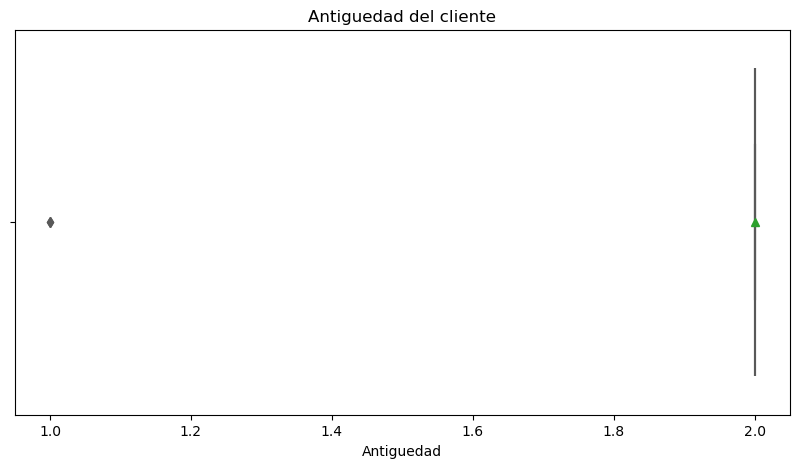

In [56]:
plt.figure(figsize=(10,5)) 
boxplot_antiguedad=sns.boxplot(x=df['Antiguedad'],palette = "Set2", showmeans=True) ## crea el boxplot
boxplot_antiguedad.set_xlabel('Antiguedad') ## cambia el título del eje x
boxplot_antiguedad.set_title('Antiguedad del cliente')
plt.show() 

Esta columna de antigüedad contiene datos inconsistentes, donde se observa que los datos son 2 o 60, esto lleva a tomar la decisión de eliminar para el modelo esta columna o solicitar al área encargada la revisión de este campo de manera que cuando se solucione, solicitar de nuevo el dataset. 

### Edad de clientes

In [57]:
# Confirmamos que no existan valores nulos
df['Edad'].isna().sum()

0

In [58]:
tabla_edad=tabla_descriptivas(df['Edad'])
tabla_edad

,Edad
count,143039.000000
mean,42.748132
std,16.754938
min,-2970.000000
25%,30.000000
50%,42.000000
75%,54.000000
max,241.000000
coef. variation,0.391946


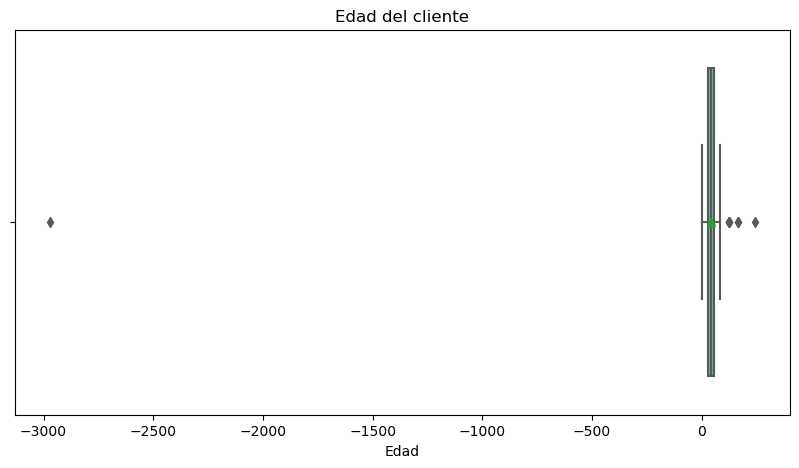

In [59]:
plt.figure(figsize=(10,5)) 
boxplot_edad=sns.boxplot(x=df['Edad'],palette = "Set2", showmeans=True) ## crea el boxplot
boxplot_edad.set_xlabel('Edad') ## cambia el título del eje x
boxplot_edad.set_title('Edad del cliente')
plt.show() 

Se detectan muchos outliers, dado que la edad mínima son 18 años y la edad máxima 65 años.

In [60]:
#Reemplazamos los outliers por valores el promedio de plazo
df.loc[df['Edad'] < 18, 'Edad'] = df["Edad"].astype("int").mean()
df.loc[df['Edad'] > 65, 'Edad'] = df["Edad"].astype("int").mean()

C:\Users\Raul Echeverry\AppData\Local\Temp\ipykernel_2848\4218108645.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '42.748131628437' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Edad'] < 18, 'Edad'] = df["Edad"].astype("int").mean()


In [61]:
tabla_edad2=tabla_descriptivas(df['Edad'])
tabla_edad2

,Edad
count,143039.000000
mean,40.805386
std,12.327001
min,18.000000
25%,31.000000
50%,42.000000
75%,50.000000
max,65.000000
coef. variation,0.302092


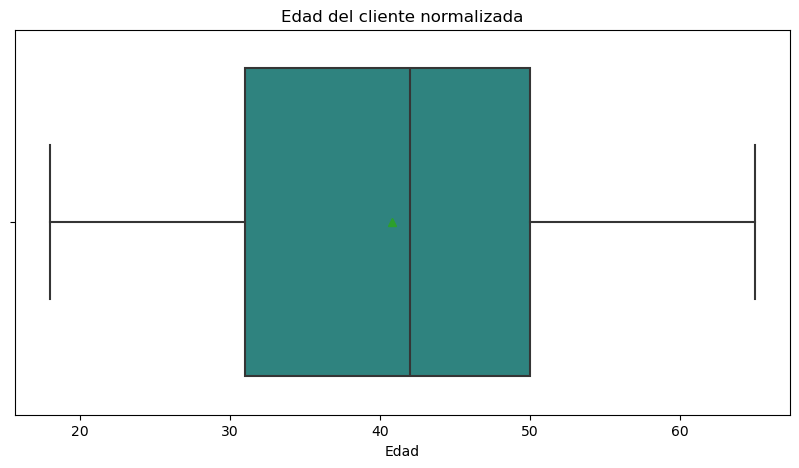

In [62]:
plt.figure(figsize=(10,5)) 
boxplot_edad2=sns.boxplot(x=df['Edad'],palette = "viridis", showmeans=True) ## crea el boxplot
boxplot_edad2.set_xlabel('Edad') ## cambia el título del eje x
boxplot_edad2.set_title('Edad del cliente normalizada')
plt.show() 

### Personas a cargo

In [63]:
# Confirmamos que no existan valores nulos
df['Personas_a_Cargo'].isna().sum()

0

In [64]:
df['Personas_a_Cargo'].describe()

count    143039.000000
mean          0.804375
std           1.149715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         200.000000
Name: Personas_a_Cargo, dtype: float64

In [65]:
tabla_cargo=tabla_descriptivas(df['Personas_a_Cargo'])
tabla_cargo

,Personas_a_Cargo
count,143039.000000
mean,0.804375
std,1.149715
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,200.000000
coef. variation,1.429327


## 4.3. Conclusión de Análisis Multivariado

Dentro del análisis unvariado se pudo evidenciar variables con presencia de valores nulos pero es preocupante la cantidad de datos atípicos encontrados especialmente en las variables numéricas, donde se encontraron valores por fuera de los parámetros por fuera del funcionamiento del negocio.

Por tanto se recomienda revisar la manera en que se esta realizando la recolección de la información con el fin de tener una mejor calidad de la DATA 

Dentro de la información analizada la de mayor relevancia es la agricultura (Aproximada mente 3 de cada 10 clientes se encuentran en este sector). Adicionalmente no existe una diferencia marcada entre genero en cuanto a solicitud y desembolso se créditos. Otro factor relevante detectado es que 5 de cada 10 cliente tiene casa propia y no esta hipotecada en el sistema financiero 

El 65,55% de los clientes son solteros o se encuentran en unión libre, lo que genera una oportunidad para la entidad para establecer campañas publicitarias segmentada a estos nichos.

Los créditos colocados en esta entidad están en promedió de monto de $5.300.000,00 con plazos promedios de 18 meses y tasa promedio de 51% EA la edad de los clientes esta en 40 años 


## 5. Análisis bivariado

#### Dado que el objetivo es identificar las características de clientes que incurren en mora, se realiza en análisis bivariado con respecto a esta variable objetivo.


### Edad Vs Clientes que incurren en mora

In [66]:
df["Mora"].value_counts()

Mora
No    120343
Si     22696
Name: count, dtype: int64

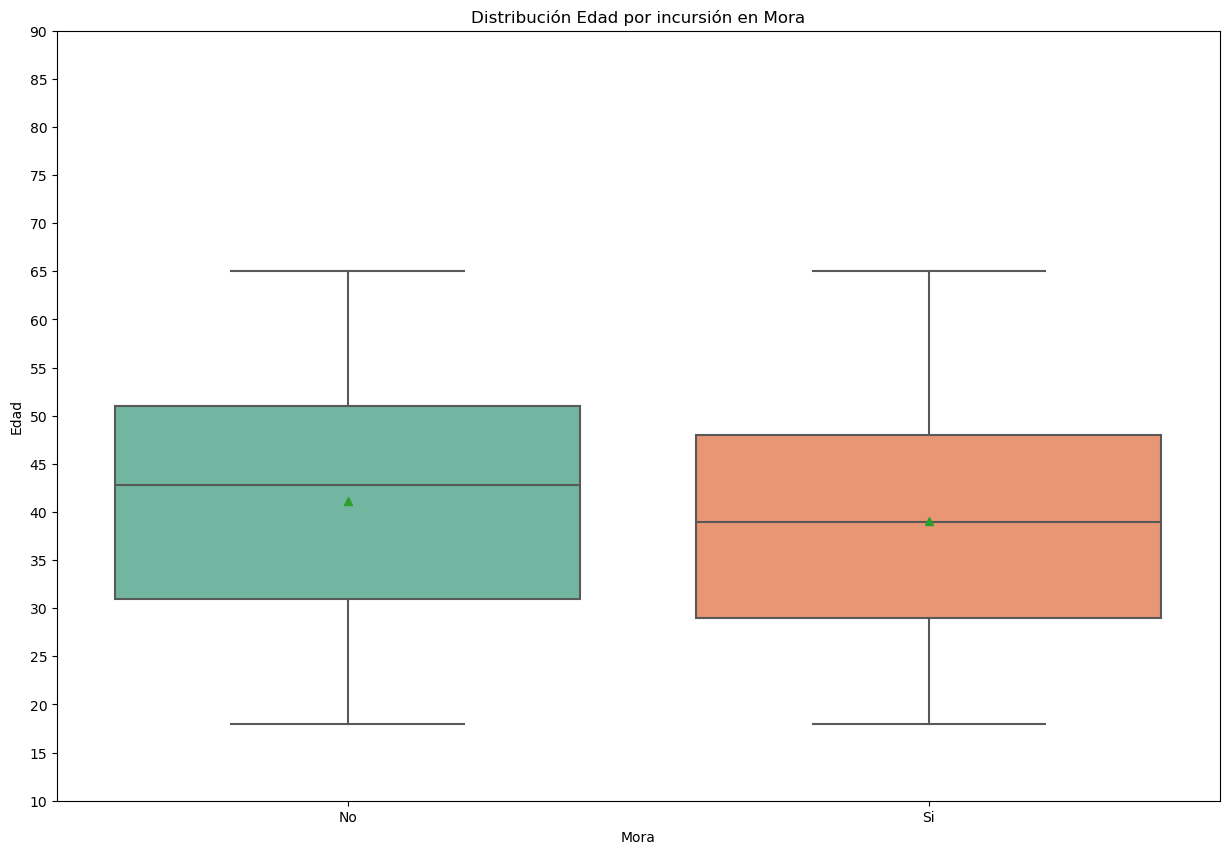

In [67]:
plt.figure(figsize=(15,10)) 
boxplot_inter_not=sns.boxplot(x=df['Mora'],y=df['Edad'],palette="Set2",showmeans=True) ## crea el boxplot
boxplot_inter_not.set_xlabel('Mora') ## cambia el título del eje x
boxplot_inter_not.set_ylabel('Edad') ## cambia el título del eje x
boxplot_inter_not.set_ylim(18, 90)                     ## cambia los límites del eje x
boxplot_inter_not.set_yticks(range(10,91,5))               ## cambia los valores del eje x
boxplot_inter_not.set_title('Distribución Edad por incursión en Mora')
plt.show() 

In [68]:
df.groupby("Mora")['Edad'].describe()

,count,mean,std,min,25%,50%,75%,max
Mora,,,,,,,,
No,120343.0,41.134471,12.315096,18.0,31.0,42.845539,51.0,65.0
Si,22696.0,39.060450,12.243283,18.0,29.0,39.000000,48.0,65.0


Como se puede evidenciar las personas que tiene una edad (dentro de los parametro de edad permitidos) son la que con mayor probabilidad incumplan con los pago y se atrasen en la cuotas

### Plazo Vs Clientes que incurren en mora

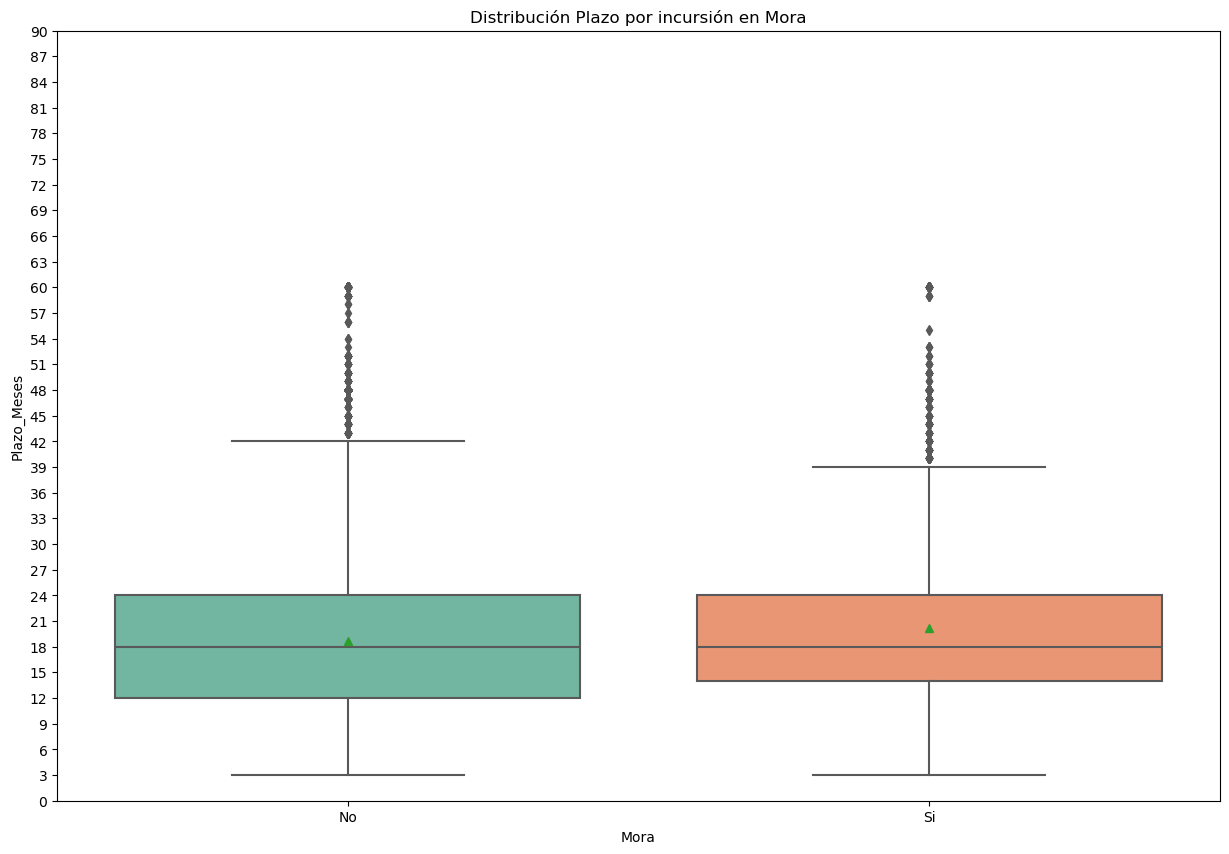

In [69]:
plt.figure(figsize=(15,10)) 
boxplot_inter_not=sns.boxplot(x=df['Mora'],y=df['Plazo_Meses'],palette="Set2",showmeans=True) ## crea el boxplot
boxplot_inter_not.set_xlabel('Mora') ## cambia el título del eje x
boxplot_inter_not.set_ylabel('Plazo_Meses') ## cambia el título del eje x
boxplot_inter_not.set_ylim(0, 90)                     ## cambia los límites del eje x
boxplot_inter_not.set_yticks(range(0,91,3))               ## cambia los valores del eje x
boxplot_inter_not.set_title('Distribución Plazo por incursión en Mora')
plt.show() 

In [70]:
df.groupby("Mora")['Plazo_Meses'].describe()

,count,mean,std,min,25%,50%,75%,max
Mora,,,,,,,,
No,120343.0,18.659064,8.122389,3.0,12.0,18.0,24.0,60.0
Si,22696.0,20.217909,8.131599,3.0,14.0,18.0,24.0,60.0


con la grafica anterior se puede intuir que los cliente para su deudas entre los 12 a 24 meses, pero a su vez estos son los periodos en los cuales tambien se dan mas las moras en los pagos

### Tasa Vs Clientes que incurren en mora

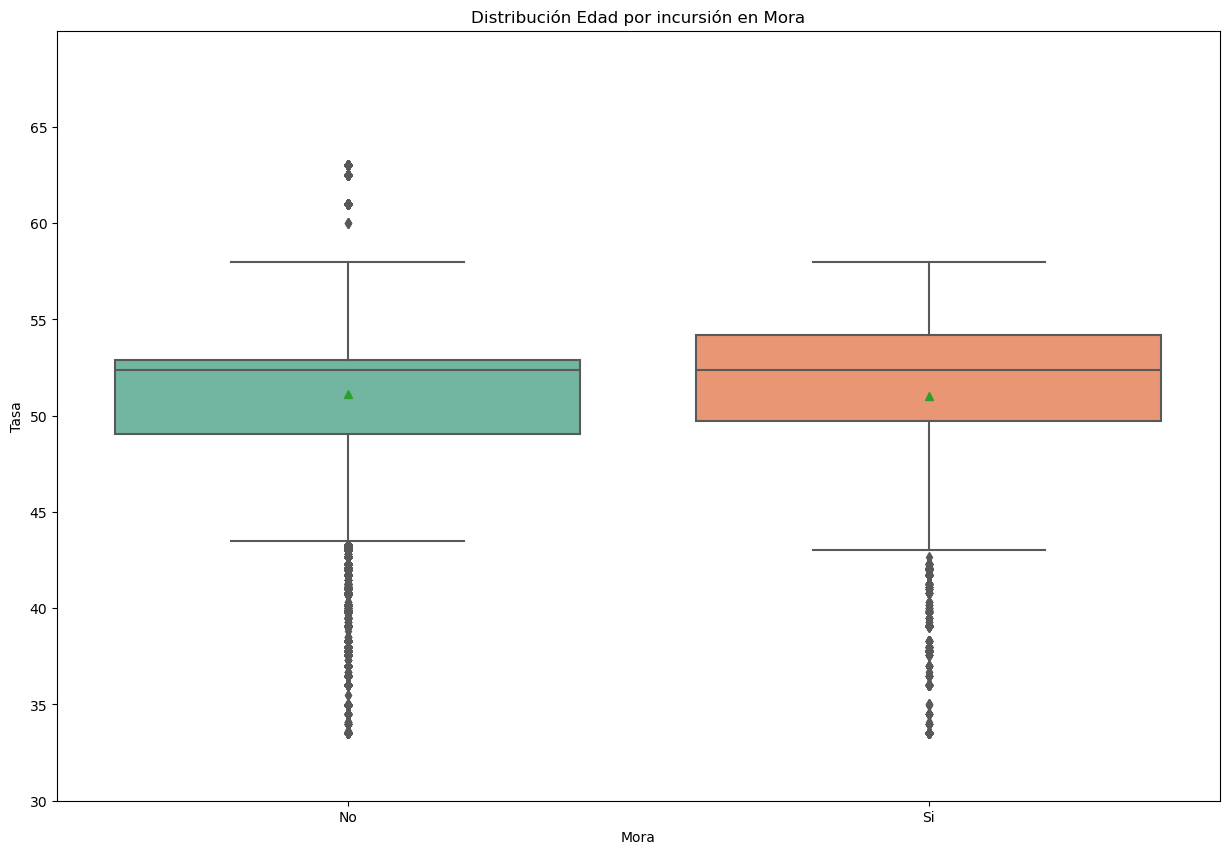

In [71]:

plt.figure(figsize=(15,10)) 
boxplot_inter_not=sns.boxplot(x=df['Mora'],y=df['Tasa'],palette="Set2",showmeans=True) ## crea el boxplot
boxplot_inter_not.set_xlabel('Mora') ## cambia el título del eje x
boxplot_inter_not.set_ylabel('Tasa') ## cambia el título del eje x
boxplot_inter_not.set_ylim(30, 70)                     ## cambia los límites del eje x
boxplot_inter_not.set_yticks(range(30,70,5))               ## cambia los valores del eje x
boxplot_inter_not.set_title('Distribución Edad por incursión en Mora')
plt.show() 

In [72]:
df.groupby("Mora")['Tasa'].describe()

,count,mean,std,min,25%,50%,75%,max
Mora,,,,,,,,
No,120343.0,51.107362,5.658316,33.5,49.04,52.39,52.89,63.0
Si,22696.0,51.003954,4.545756,33.5,49.70,52.39,54.18,58.0


Las personas que solicitaron y les otorgaron un crédito con tasas más altas, son más propensas a incurrir en mora.

### 5.1. Conclusión análisis multivariado

Se puede evidenciar en lo analizado que los clientes de menor edad son más propensos a quedar en mora frente a sus obligaciones financieras. También se detectó una leve relación en la imposición de la tasa, dado una tasa mayor también la incursión en mora es impactada. Sin embargo no se evidencio un variable que tenga una fuerte correlación dentro de las analizadas.

### 6. Modelo predictivo de MORA

In [73]:
# Se trae el DATASET con las modificaciones que se le a hecho en las etapas anteriores
df

,ID,Sector_Actividad,Tasa,Monto,Plazo_Meses,Antiguedad,Sexo,Tipo_Vivienda,Tipo_cliente,Edad,Personas_a_Cargo,Estado_Civil,Mora
0,1,COMERCIO,52.89,2400000.0,12.0,2,Mujer,Arrendada,Nuevo,24.000000,0,Unión Libre,No
1,2,AGRICULTURA,55.00,5582000.0,23.0,2,Mujer,Arrendada,Nuevo,34.000000,1,Casado/a,Si
2,3,COMERCIO,52.39,2300000.0,20.0,2,Mujer,Arrendada,Nuevo,23.000000,0,Soltero/a,No
3,4,ARTESANÍAS,55.20,1774000.0,16.0,2,Hombre,Familiar,Nuevo,22.000000,0,Soltero/a,No
4,5,SERVICIOS,63.00,2000000.0,14.0,2,Mujer,Familiar,Nuevo,21.000000,0,Soltero/a,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143034,143035,COMERCIO,52.89,4350000.0,18.0,2,Mujer,Propia sin Deuda,Nuevo,35.000000,3,Soltero/a,No
143035,143036,COMERCIO,46.00,15300000.0,12.0,2,Mujer,Propia sin Deuda,Nuevo,32.000000,1,Casado/a,No
143036,143037,COMERCIO,52.39,4500000.0,12.0,2,Mujer,Propia sin Deuda,Nuevo,42.000000,2,Unión Libre,No
143037,143038,COMERCIO,43.14,8200000.0,24.0,2,Hombre,Arrendada,Nuevo,42.845539,0,Unión Libre,No


In [74]:
#Reemplazamos variables categóricas por numéricas: Genero,tipo de cliente y mora
df['Sexo'] = df['Sexo'].replace({"Hombre": 1, "Mujer": 0})
df['Sexo'] = df['Sexo'].astype(int)

df['Tipo_cliente'] = df['Tipo_cliente'].replace({"Nuevo": 1, "Preferencial": 0})
df['Tipo_cliente'] = df['Tipo_cliente'].astype(int)

df['Mora'] = df['Mora'].replace({"Si": 1, "No": 0})
df['Mora'] = df['Mora'].astype(int)

In [75]:
df

,ID,Sector_Actividad,Tasa,Monto,Plazo_Meses,Antiguedad,Sexo,Tipo_Vivienda,Tipo_cliente,Edad,Personas_a_Cargo,Estado_Civil,Mora
0,1,COMERCIO,52.89,2400000.0,12.0,2,0,Arrendada,1,24.000000,0,Unión Libre,0
1,2,AGRICULTURA,55.00,5582000.0,23.0,2,0,Arrendada,1,34.000000,1,Casado/a,1
2,3,COMERCIO,52.39,2300000.0,20.0,2,0,Arrendada,1,23.000000,0,Soltero/a,0
3,4,ARTESANÍAS,55.20,1774000.0,16.0,2,1,Familiar,1,22.000000,0,Soltero/a,0
4,5,SERVICIOS,63.00,2000000.0,14.0,2,0,Familiar,1,21.000000,0,Soltero/a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143034,143035,COMERCIO,52.89,4350000.0,18.0,2,0,Propia sin Deuda,1,35.000000,3,Soltero/a,0
143035,143036,COMERCIO,46.00,15300000.0,12.0,2,0,Propia sin Deuda,1,32.000000,1,Casado/a,0
143036,143037,COMERCIO,52.39,4500000.0,12.0,2,0,Propia sin Deuda,1,42.000000,2,Unión Libre,0
143037,143038,COMERCIO,43.14,8200000.0,24.0,2,1,Arrendada,1,42.845539,0,Unión Libre,0


In [76]:
df.to_csv("morepipeline.csv")

In [77]:
# Importamos las librerias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# Dividimos el conjunto de datos en características (X) y etiquetas (y)
X = df[["Tasa", "Monto", "Plazo_Meses", "Sexo", "Tipo_cliente", "Edad"]]
y = df["Mora"]

In [79]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.83


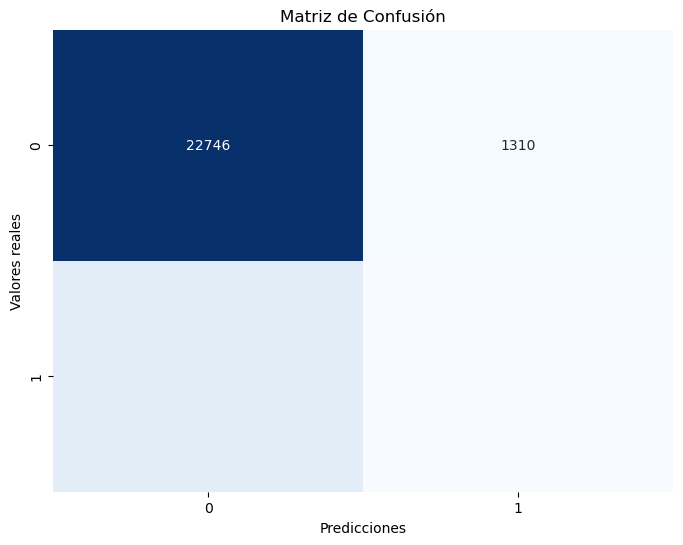


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     24056
           1       0.46      0.25      0.32      4552

    accuracy                           0.83     28608
   macro avg       0.67      0.60      0.62     28608
weighted avg       0.80      0.83      0.81     28608



In [80]:
# Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

Se obtiene un resultado del modelo de predicción de arroja un accuracy de 0.83 en la predicción de los clientes que son propenso a caer en mora, dado las variables del dataset.